# Clothes recognition with Neural Networks

* Data is available from TensorFlow.

* Application of neural networks in the classification of the [MNIST](https://github.com/zalandoresearch/fashion-mnist) dataset.

* Contains 70,000 gray and white images belonging to 10 clothing categories.

* Each photo is 28x28 pixels.

In [2]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

* The tags are the class names.

| Label	| Class |
|-------|-------|
|   0   | T-shirt/top |
|   1   | Trouser |
|   2   | Pullover |
|   3   | Dress |
|   4   | Coat |
|   5   | Sandal |
|   6   | Shirt |
|   7   | Sneaker |
|   8   | Bag |
|   9   | Ankle boot |


* We will store the class names in a list to have them available later.

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

* The training data is 60,000 images, each measuring 28x28 pixels.

* There are also 60,000 tags, each from 0 to 9.

In [4]:
print(train_images.shape)
print(len(train_labels))
print(train_labels)

(60000, 28, 28)
60000
[9 0 0 ... 3 0 5]


* The control data consists of 10,000 images, each 28x28 pixels.

* And, of course, 10,000 tags.

In [5]:
print(test_images.shape)
print(len(test_labels))

(10000, 28, 28)
10000


* Let's look at a picture.

* Pixel values ​​can range from 0 to 255.

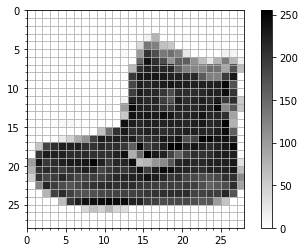

In [10]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.margins(0, 0)  
plt.imshow(train_images[0], 
           extent=(0, train_images[0].shape[0], train_images[0].shape[1], 0),
           cmap=plt.cm.binary)
plt.colorbar()
plt.xlim(0, 28)
plt.ylim(28, 0)
minor_ticks = np.arange(0, 28, 1)
ax.set_xticks(minor_ticks, minor=True)
ax.set_yticks(minor_ticks, minor=True)
ax.grid(which='both')

* Neural networks also don't like highly variable data, so we'll transform it to have values ​​between 0 and 1.

In [11]:
train_images = train_images / 255.0

test_images = test_images / 255.0

* To see the first 25 photos.

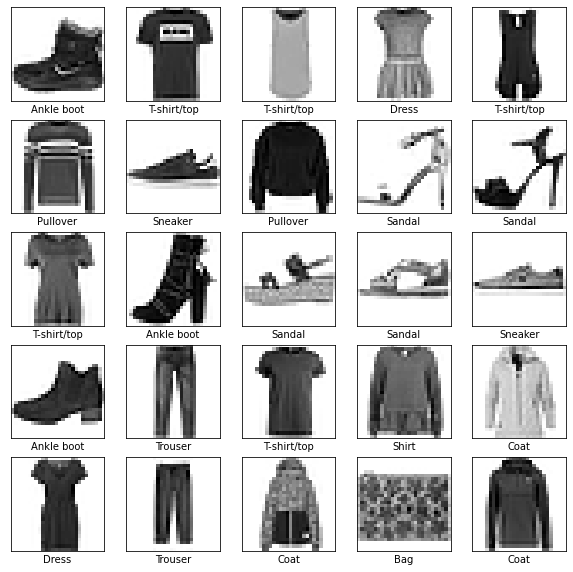

In [12]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

* We will use a new activation function, the *rectifier* (rectifier):
$$ f(x)=x^{+}=\max(0,x)$$

* A neuron, or *unit* (unit) that uses the rectifier is called a *rectified linear unit*, or simply ReLU.

* Sometimes we use a smooth approximation of , the function *softplus*:
$$f(x)=\log(1+ e^{x})$$

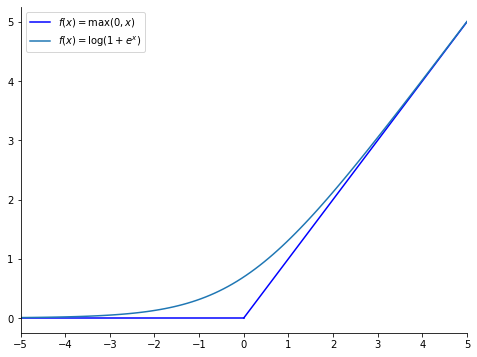

In [13]:
fig = plt.figure(figsize=(8, 6))
ax = plt.axes()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xlim((-5, 5))
plt.xticks(np.arange(-5, 6, 1))
x = np.linspace(-5, 0, 50)
y = np.zeros_like(x)
plt.plot(x, y, color='blue')
x = np.linspace(0, 5, 50)
y = x
relu, = plt.plot(x, y, color='blue', label=r"$f(x) = \max(0, x)$")
x = np.linspace(-5, 5, 100)
y = np.log(1 + np.exp(x))
softplus, = plt.plot(x, y, label=r"$f(x) = \log(1 + e^{x})$")
plt.legend(handles=[relu, softplus], loc='best')

* Now let's set up our model.

* It will consist of three layers.

* The first layer after the input will convert the input from 28x28 arrays to one-dimensional arrays of 784 pixels.

* The second layer will be densely bonded. It will have 128 nodes (neurons), which will be ReLU.

* The third layer will again be densely connected and will not have an activation function.

* So the activation will be linear, $a(x) = x$, and the neuron will simply give the weighted input plus the bias.

In [14]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10)
])

2022-03-01 12:22:01.017153: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


* With the `summary()` method we can see the network in table form.

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


* Alternatively, we can see it graphically.

* The input to the first layer and the `Flatten' layer is 3D. This is because the data comes in bundles, but the size of the bundle will be known at runtime, so it appears as `None`.

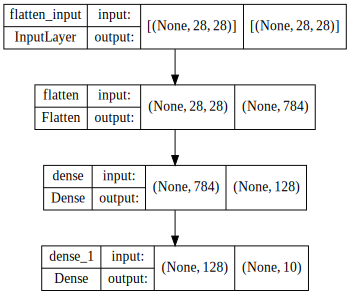

In [16]:
from IPython.display import SVG
from tensorflow.keras.utils import model_to_dot
SVG(model_to_dot(model, show_shapes=True, dpi=70).create(prog='dot', format='svg'))

* We can confirm the number of parameters:

 * $784 \times 128 = $100,352 weights between the `Flatten' layer and the next layer.

 * $128 \times 10 = 1280$ weights between the hidden layer and the output layer.

 * $128$ polarizations in the hidden layer.

 * $10$ polarizations in the output layer.

 * Total: $100,352 + 1280 + 128 + 10 = $101,770

In [37]:
model.count_params()

101770

* Now we can proceed to the definition:

 * Of the loss function.
 * The optimizer.
 * The metric evaluation.

* We want the loss function to estimate the error at the output of the network.

* But what exactly is output?

* It is a vector of 10 numbers, one for each neuron in the output layer.

* Each of these numbers gives the network's belief that the input sample belongs to that class.

In [18]:
# As we have not trained the model yet, these are random values.
predictions = model(train_images[:1]).numpy()
print(predictions)
print('min =', np.min(predictions), 
      'max =', np.max(predictions), 
      'sum =', np.sum(predictions))

[[-0.07175021 -0.41611964 -0.27806014  0.8113954  -0.51662374  1.1836927
   0.15438977 -0.25337994 -0.290061   -0.6870176 ]]
min = -0.6870176 max = 1.1836927 sum = -0.36353445


* Our targets are also vectors with 10 numbers, e.g. if the garment is a boot:

 ```[0, 0, 0, 0, 0, 0, 0, 0, 0, 1]```

* Each of these vectors has a value equal to 1 (the correct class), while the other values ​​are equal to 0.

* This means that each target is actually a probability distribution, since it is a set of values ​​from zero to one that add up to one.

* So we want to transform the output of the network into a probability distribution.

* It will be a vector with ten values, each between zero and one, that will add up to one.

* But at the moment the output of the network is not such a distribution.

* It's just the output of the final layer neurons, which don't even have an activation function, so just a linear combination of the inputs.

* Model predictions in this form are called *logits*.

* To transform the logits into a probability distribution we use the *softmax* function.

* If we have $K$ classes, and $k$ neuron has $z_k$ output, the softmax function is defined as:
$$\sigma(z_{j}) = {\frac {e^{z_{j}}}{\sum _{k=1}^{K}e^{z_{k}}}}\, , j = 1, 2, \ldots, k$$

* In essence, softmax gives the inputs to the exponential function and normalizes.

* The exponential function means that a unit increase in the input has a multiplicative effect on the output.

* Conversely, if the input decreases, we get a fraction of the input at the output.

* softmax divides by the sum of the exponential function on the inputs so that the result is between and one.

In [19]:
softmax_predictions = tf.nn.softmax(predictions).numpy()
print(softmax_predictions)
print('min =', np.min(softmax_predictions), 
      'max =', np.max(softmax_predictions), 
      'sum =', np.sum(softmax_predictions))

[[0.0798526  0.05658891 0.06496654 0.19312313 0.05117796 0.2802341
  0.10011528 0.06658988 0.06419155 0.04316004]]
min = 0.043160036 max = 0.2802341 sum = 0.99999994


In [21]:
import matplotlib.pyplot as plt
import numpy as np

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import optimizers

* In TensorFlow, we specify to use the result of softmax in the loss calculation by giving the `from_logits=True` parameter.

* And the loss function we will use is implemented in the `SparseCategoricalCrossEntropy` class, so we will give `SparseCategoricalCrossEntropy(from_logits=True)`.

* We will define the optimizer, this time another one, the Adam optimizer (Adaptive Moment Estimation).

* We give the loss as explained above, and the performance metric.

In [22]:
model.compile(
    optimizer=optimizers.Adam(), 
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'])

* We proceed to the training.

* We will leave `batch_size` at its default value, i.e. 32.

* Each season will have $60,000 / 32 = $1875 in kits.

In [23]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 911us/step - loss: 0.5008 - accuracy: 0.8239
Epoch 2/5
1875/1875 [==============================] - 2s 936us/step - loss: 0.3754 - accuracy: 0.8645
Epoch 3/5
1875/1875 [==============================] - 2s 902us/step - loss: 0.3370 - accuracy: 0.8768
Epoch 4/5
1875/1875 [==============================] - 2s 900us/step - loss: 0.3128 - accuracy: 0.8860
Epoch 5/5
1875/1875 [==============================] - 2s 907us/step - loss: 0.2957 - accuracy: 0.8902


* We will check the system performance with the test data.

* These will be read in $\lceil1000 / 32\rceil = 313$ batches.

In [24]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

313/313 [==============================] - 0s 667us/step - loss: 0.3493 - accuracy: 0.8695
Test accuracy: 0.8694999814033508


* The results are as expected, in the sense that the correctness is lower than what we saw in training.

* Essentially, in education we have reached overfitting.

* After training, we can use the network for predictions.

* But, the output of the network is logits.

* We will turn them into probabilities.

* To do this, we take our original network and add a `SoftMax()` layer to it.

In [25]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)

* Now in the `predictions` variable we have the predictions for the control data.

* To see the prediction for the first image:

In [26]:
predictions[0]

array([1.00176003e-05, 9.51470014e-09, 1.51536597e-07, 2.66547119e-07,
       3.32153945e-06, 7.48498132e-03, 1.28226575e-05, 2.84774974e-02,
       6.08901355e-05, 9.63949978e-01], dtype=float32)

* Or, in percentages:

In [27]:
for i in predictions[0]:
    print(f'{i:f}')

0.000010
0.000000
0.000000
0.000000
0.000003
0.007485
0.000013
0.028477
0.000061
0.963950


* The correct clothing is:

In [28]:
test_labels[0]

9

* We will make a helper function which will show us the prediction and the target.

* If the prediction matches the target, it will be blue. Otherwise, it will be red.

In [30]:
def plot_image(i, predictions, true_labels, img):
    predictions_array, true_label, img = predictions[i], true_labels[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img, cmap=plt.cm.binary)
    
    predicted_label = np.argmax(predictions_array)
    
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
  
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                         100*np.max(predictions_array),
                                         class_names[true_label]),
                                         color=color)

* We will also make another auxiliary function that will show us all the probabilities that the network gives for each image.

In [31]:
def plot_value_array(i, predictions, true_labels, show_xticks=False):
    predictions_array, true_label = predictions[i], true_labels[i]
    plt.grid(False)
    plt.xticks([])
    if show_xticks:
        plt.xticks(range(10), class_names, rotation='vertical')
    else:
        plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1]) 
    predicted_label = np.argmax(predictions_array)
 
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

* Let's see what we get for the first image.

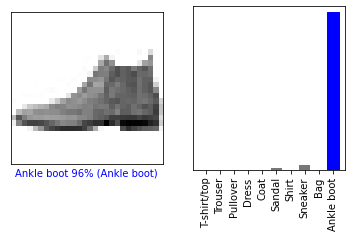

In [32]:
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(0, predictions, test_labels, test_images)

plt.subplot(1,2,2)
plot_value_array(0, predictions, test_labels, True)

* It will be interesting to see what happened to the images that the network got wrong.

* Let's find them.

In [33]:
predicted_labels = np.apply_along_axis(np.argmax, 1, predictions)
print('Predicted labels:', predicted_labels)
misclassified = test_labels != predicted_labels
print('Misclassified:', misclassified)
misclassified_indices = np.argwhere(misclassified)
print('Misclassified indices:\n', misclassified_indices)
print('Number of misclassified:', len(misclassified_indices))

Predicted labels: [9 2 1 ... 8 1 5]
Misclassified: [False False False ... False False False]
Misclassified indices:
 [[  17]
 [  23]
 [  25]
 ...
 [9977]
 [9979]
 [9985]]
Number of misclassified: 1305


* Next, let's see them.

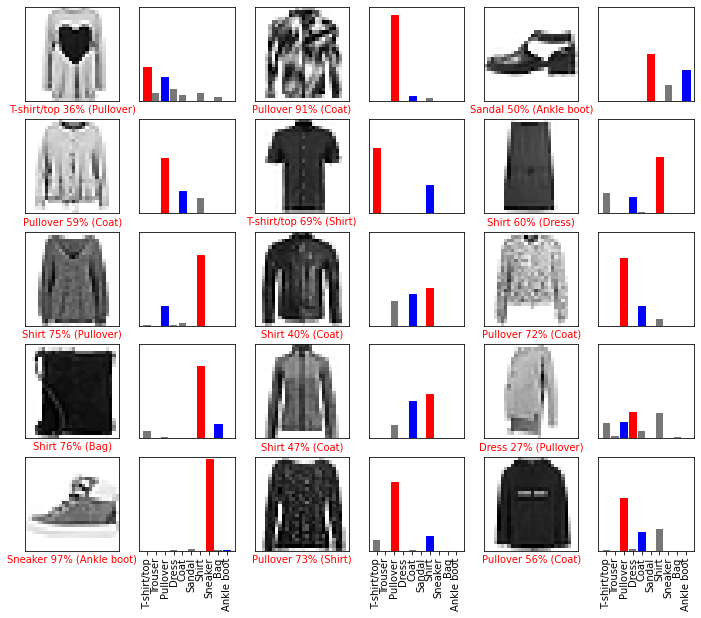

In [34]:
num_rows = 5
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))

show_x_ticks = False
for i in range(num_images):
    if i >= num_images - num_cols:
        show_x_ticks = True
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(misclassified_indices[i-1][0], predictions, test_labels, test_images)
    plt.subplot(num_rows, 2 * num_cols, 2*i+2)
    plot_value_array(misclassified_indices[i-1][0], predictions,  test_labels, show_x_ticks)

* As always, we can use the sort reference.

* Since `predictions` are probability distributions, we get the maximum likelihood class with `np.argmax()`.

In [35]:
from sklearn.metrics import classification_report

print(classification_report(test_labels, np.argmax(predictions, axis=1)))

              precision    recall  f1-score   support

           0       0.83      0.81      0.82      1000
           1       0.99      0.97      0.98      1000
           2       0.72      0.84      0.77      1000
           3       0.84      0.92      0.88      1000
           4       0.82      0.68      0.74      1000
           5       0.99      0.94      0.96      1000
           6       0.68      0.67      0.68      1000
           7       0.92      0.96      0.94      1000
           8       0.98      0.95      0.97      1000
           9       0.95      0.95      0.95      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



* And the confusion table:

In [36]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(test_labels, np.argmax(predictions, axis=1)))

[[815   2  31  32   3   0 111   0   6   0]
 [  4 967   1  23   3   0   1   0   1   0]
 [ 17   0 837  18  72   0  55   0   1   0]
 [ 20   7  11 917  16   0  25   0   4   0]
 [  0   0 157  59 679   0 104   0   1   0]
 [  0   0   0   1   0 942   0  33   2  22]
 [115   0 118  38  51   0 672   0   6   0]
 [  0   0   0   0   0   8   0 964   1  27]
 [  7   0  13   6   2   1  13   4 954   0]
 [  0   0   0   0   0   4   1  47   0 948]]
